# Modal Tutorial 05 Part B: Types of Excitation for Experimental Modal Analysis

When performing experimental modal analysis, the type of excitation applied to a structure matters a great deal.  Traditionally, modal excitation has come in two flavors: impact testing and shaker testing.  However, there are various new techniques that blur the lines between the two types of tests.  This tutorial will discuss some of the requirements for the excitation (and the responses therefrom) used in modal testing.

## Requirements for the FFT

The goal of modal testing is to compute the frequency response function, to which modes can be fit.  The previous tutorial discussed approaches to computing the frequency response function.  Common among all of the broadband techniques was the use of the Fast Fourier Transform (FFT) which is used to transform a sampled signal into its various frequency components.  Let's first discuss some of the practical issues surrounding the use of the FFT.

First, let's see what the FFT is supposed to do.  Say, for example, that we have a signal that is a sine wave at 10 Hz.  We can plot that signal, and compute its FFT, and we can see that the frequency of the sine wave has been properly identified.

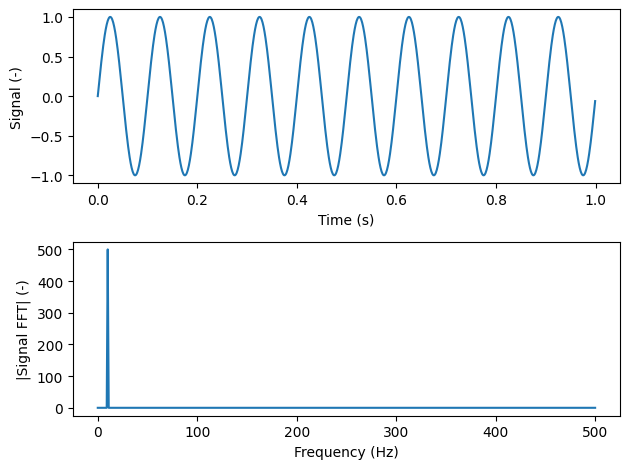

In [1]:
import numpy as np
import sdynpy as sdpy
import matplotlib.pyplot as plt
import scipy.signal

# Compute the signal
frequency = 10 # Hz
sample_rate = 1000 # Hz
dt = 1/sample_rate # seconds
num_samples = 1000 # Samples
times = np.arange(num_samples)*dt
signal = sdpy.generator.sine(frequency,dt,num_samples)

# Compute its FFT
frequency_lines = np.fft.rfftfreq(num_samples,dt)
signal_fft = np.fft.rfft(signal)

# Plot both
fig,ax = plt.subplots(2,1,num='Sine Signal')
ax[0].plot(times,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[1].plot(frequency_lines,np.abs(signal_fft))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|Signal FFT| (-)')
fig.tight_layout()

We set up our signal such that the sine wave has a length of 1 second, so we can quickly verify that there are 10 cycles of the sine wave over 1 second, which is equivalent to the specified frequency of 10 Hz.  If we look at the amplitude of the FFT of the signal, we see that the entire FFT is zero, except for the frequency line at 10 Hz.  Therefore, the FFT has identified the frequency component in the signal.  Let's look at a more complex example with a signal of many sinusoidal components.

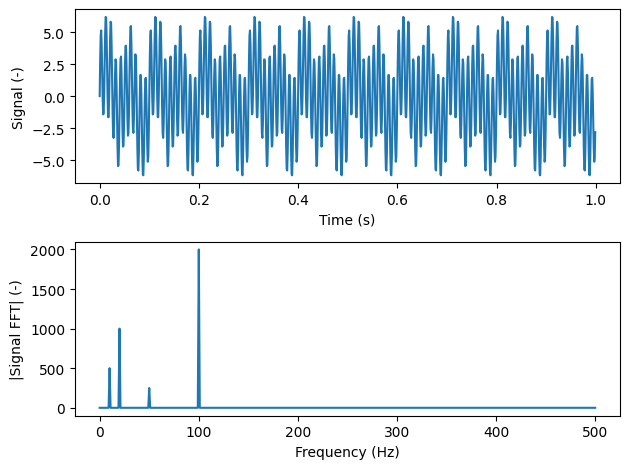

In [2]:
# Compute the signal
frequencies = [10,20,50,100] # Hz
amplitudes = [1,2,0.5,4]
sample_rate = 1000 # Hz
dt = 1/sample_rate # seconds
num_samples = 1000 # Samples
times = np.arange(num_samples)*dt
signal = np.sum(
    sdpy.generator.sine(frequencies,dt,num_samples,amplitudes),
    axis=0)

# Compute its FFT
frequency_lines = np.fft.rfftfreq(num_samples,dt)
signal_fft = np.fft.rfft(signal)

# Plot both
fig,ax = plt.subplots(2,1,num='Sine Signal')
ax[0].plot(times,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[1].plot(frequency_lines,np.abs(signal_fft))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|Signal FFT| (-)')
fig.tight_layout()

Note that not only does the FFT identify the correct frequency components, it also identifies the correct amplitudes of the sinusoidal components in the signal.

Mathematically inclined readers familiar with the continuous Fourier Transform may be aware that the Fourier transform is actually computed using all time from negative to positive infinity.

$$\hat{f}(\xi)=  \int_{-\infty}^\infty f(x)e^{-i2\pi\xi x}dx$$ 

However, when running an experiment to identify frequency components of some response, we cannot afford to wait an infinite amount of time.  We would much rather wait a finite amount of time to measure the signal.  However, the law of the Fourier transform still stands; the signal must be infinitely long.  Therefore, when performing the FFT, the assumption is that the signal could repeat indefinitely.  For example, if we repeat the original 10 Hz sine wave signal indefinitely, we are still left with a 10 Hz sine wave.

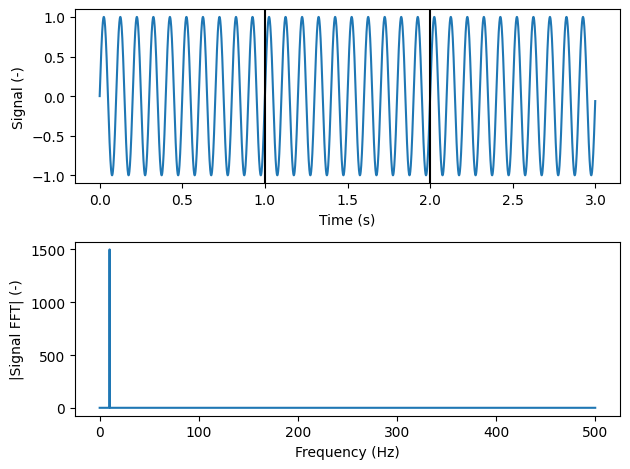

In [3]:
# Compute the signal
frequency = 10 # Hz
sample_rate = 1000 # Hz
dt = 1/sample_rate # seconds
num_samples = 3000 # Samples
times = np.arange(num_samples)*dt
signal = sdpy.generator.sine(frequency,dt,num_samples)

# Compute its FFT
frequency_lines = np.fft.rfftfreq(num_samples,dt)
signal_fft = np.fft.rfft(signal)

# Plot both
fig,ax = plt.subplots(2,1,num='Sine Signal')
ax[0].plot(times,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[0].axvline(1,color='k')
ax[0].axvline(2,color='k')
ax[1].plot(frequency_lines,np.abs(signal_fft))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|Signal FFT| (-)')
fig.tight_layout()

Given this constraint, we are limited in the frequencies we can identify for a finite signal.  Only frequency components that can form a standing wave within the length of time specified are valid.  Stated another way, any sinusoidal component of a signal must have an integer number of periods within the measurement frame.  Let's plot a few sine waves at varying frequencies to see what is meant by this.

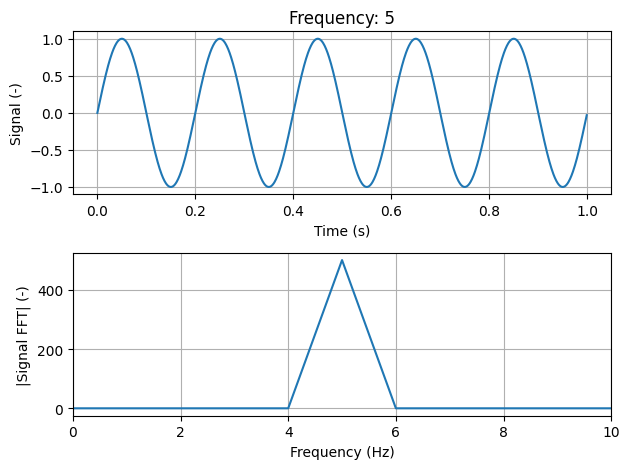

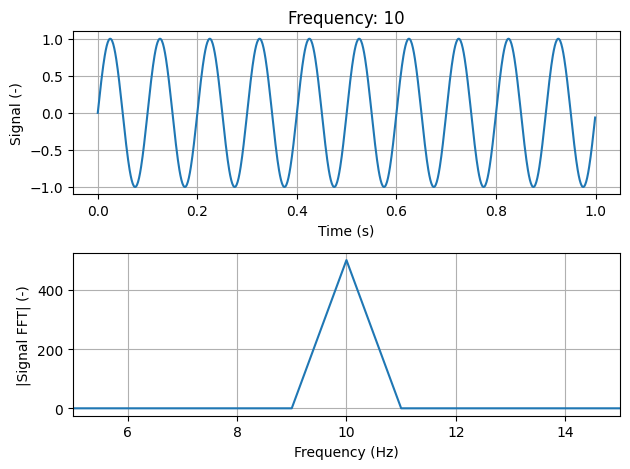

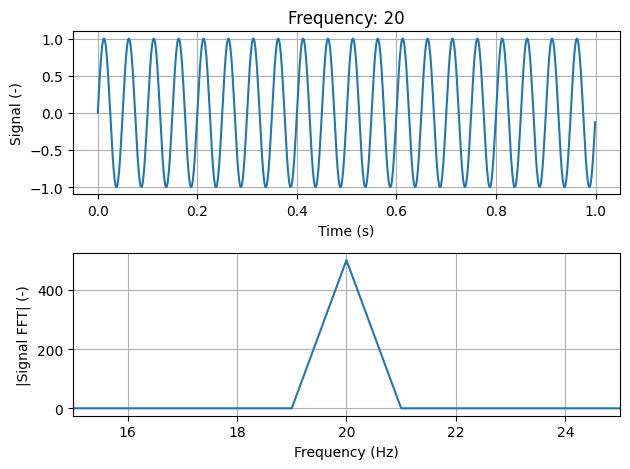

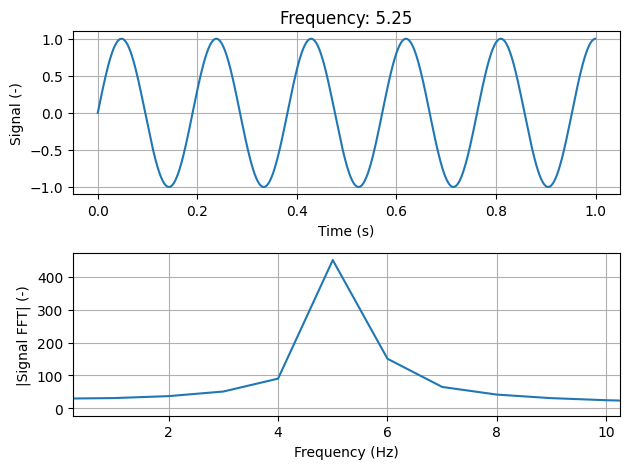

In [4]:
for frequency in [5,10,20,5.25]:
    # Compute the signal
    sample_rate = 1000 # Hz
    dt = 1/sample_rate # seconds
    num_samples = 1000 # Samples
    times = np.arange(num_samples)*dt
    signal = sdpy.generator.sine(frequency,dt,num_samples)

    # Compute its FFT
    frequency_lines = np.fft.rfftfreq(num_samples,dt)
    signal_fft = np.fft.rfft(signal)

    # Plot both
    fig,ax = plt.subplots(2,1,num='Sine Signal: {:}'.format(frequency))
    ax[0].set_title('Frequency: {:}'.format(frequency))
    ax[0].plot(times,signal)
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Signal (-)')
    ax[1].plot(frequency_lines,np.abs(signal_fft))
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('|Signal FFT| (-)')
    ax[1].set_xlim(frequency-5,frequency+5)
    ax[0].grid(True)
    ax[1].grid(True)
    fig.tight_layout()

Let's briefly compare the results above.  In the first three examples, we see that we have signals with 5 Hz, 10 Hz, and 20 Hz.  Given the frame time of 1 second, each of these signals will have integer numbers of periods within the measurement frame.  The 5 Hz sine wave, for example, have 5 cycles in the 1 second measurement frame.  On the other hand, the 5.25 Hz signal does not have an integer number of periods within one measurement window.  There is an extra quarter-period.  We can see the effect of this if we try to repeat the signal indefinitely, as the FFT assumes we do.

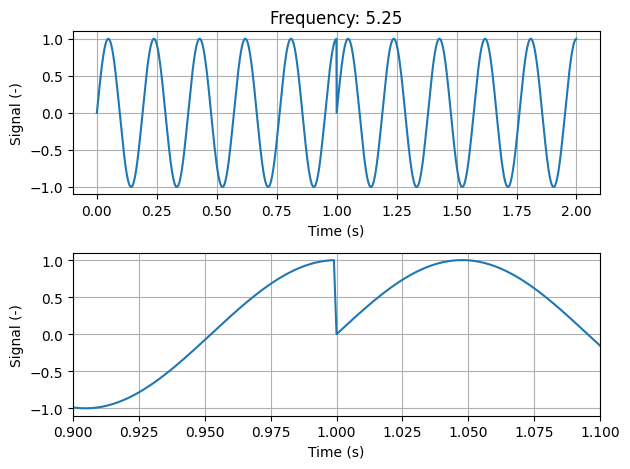

In [5]:
fig,ax = plt.subplots(2,1,num='Leakage demonstration')
ax[0].set_title('Frequency: {:}'.format(frequency))
ax[0].plot(np.arange(num_samples*2)*dt,np.concatenate((signal,signal)))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[1].plot(np.arange(num_samples*2)*dt,np.concatenate((signal,signal)))
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Signal (-)')
ax[1].set_xlim(0.9,1.1)
ax[0].grid(True)
ax[1].grid(True)
fig.tight_layout()

We see that when we repeat this signal, we introduce a discontinuity in the signal.  This discontinuity is not in the real signal, only in our sampling of it; however, the FFT has no knowledge of our real signal.  The FFT believes that the signal supplied to the excitation must repeat, so it assumes that the real signal is something that it isn't.  The FFT believes that instead of being a 5.25 Hz sine wave, it is instead a sum of many sine waves that add up to the signal shown.

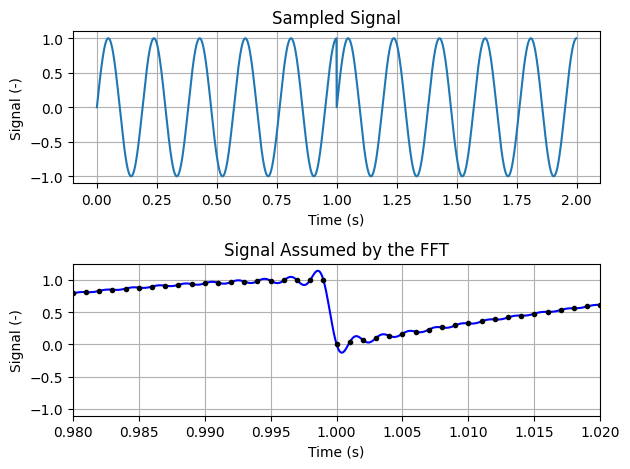

In [6]:
assumed_signal = scipy.signal.resample(signal,num_samples*10)
fig,ax = plt.subplots(2,1,num='Leakage demonstration')
ax[0].set_title('Sampled Signal')
ax[0].plot(np.arange(num_samples*2)*dt,np.concatenate((signal,signal)))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[1].plot(np.arange(num_samples*10*2)*dt/10,np.concatenate((assumed_signal,assumed_signal)),'b-')
ax[1].plot(np.arange(num_samples*2)*dt,np.concatenate((signal,signal)),'k.')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Signal (-)')
ax[1].set_xlim(0.98,1.02)
ax[1].set_title('Signal Assumed by the FFT') 
ax[0].grid(True)
ax[1].grid(True)
fig.tight_layout()

We can see in the previous plot that a signal can be constructed that satisfies the sampled data, but is also continuous between measurement frames.  This results in the creation of "extra" frequency content in the FFT that was not in the original signal.  This is a phenomenon called "spectral leakage", where a frequency component (in this case, 5.25 Hz) leaks into the surrounding frequency bins.  We can clearly see this in the FFTs of the signals, where the 5, 10, and 20 Hz signals all contain exactly 1 frequency bin with non-zero amplitude, but the 5.25 Hz frequency bin contains significant content at many frequency bins.

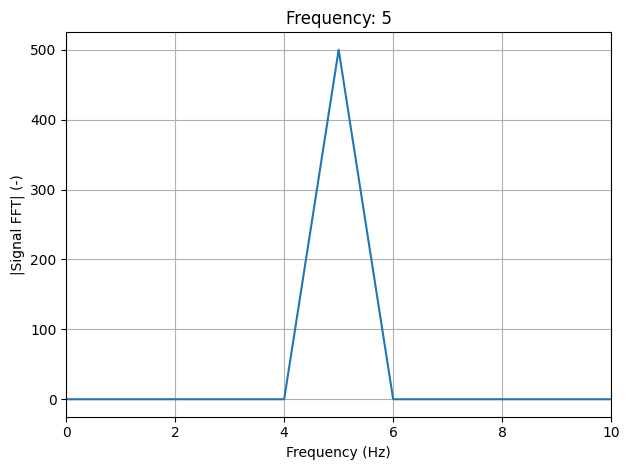

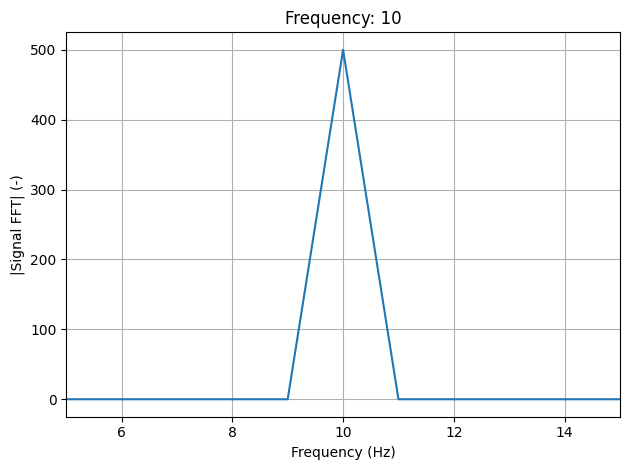

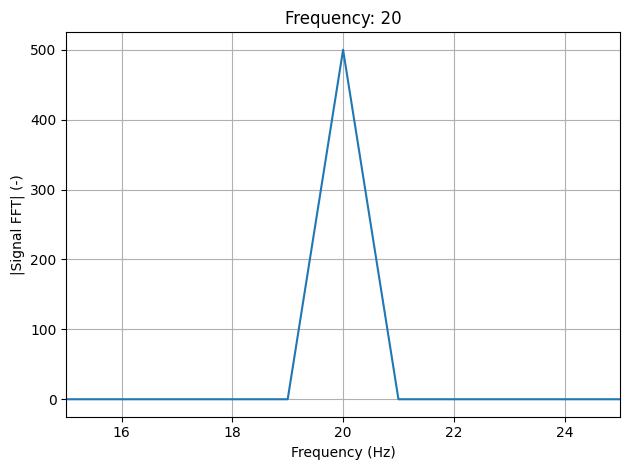

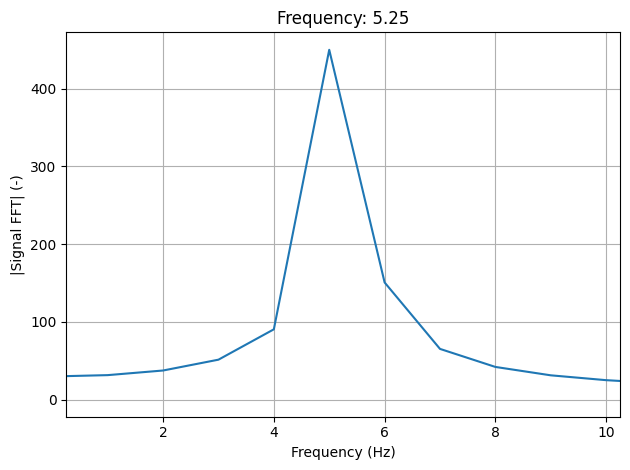

In [7]:
for frequency in [5,10,20,5.25]:
    # Compute the signal
    sample_rate = 1000 # Hz
    dt = 1/sample_rate # seconds
    num_samples = 1000 # Samples
    times = np.arange(num_samples)*dt
    signal = sdpy.generator.sine(frequency,dt,num_samples)

    # Compute its FFT
    frequency_lines = np.fft.rfftfreq(num_samples,dt)
    signal_fft = np.fft.rfft(signal)

    # Plot both
    fig,ax = plt.subplots(1,1,num='Sine Signal: {:}'.format(frequency))
    ax.set_title('Frequency: {:}'.format(frequency))
    ax.plot(frequency_lines,np.abs(signal_fft))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|Signal FFT| (-)')
    ax.set_xlim(frequency-5,frequency+5)
    ax.grid(True)
    fig.tight_layout()

This is the first lesson that the FFT can teach us when computing frequency response functions: all signals transformed by the FFT must be periodic within the measurement window, otherwise leakage will occur and the frequency-domain representation of the signal, which is used to compute the frequency response function, will be distorted.

Note that this does not imply that all signals must be sinusoidal.  For example, an excitation signal starting and ending at the same value (for example, zero) is also periodic within the measurement window, and no leakage will occur.  This means that impacts or other transient signals that start and stop within the measurement frame will also be leakage-free.

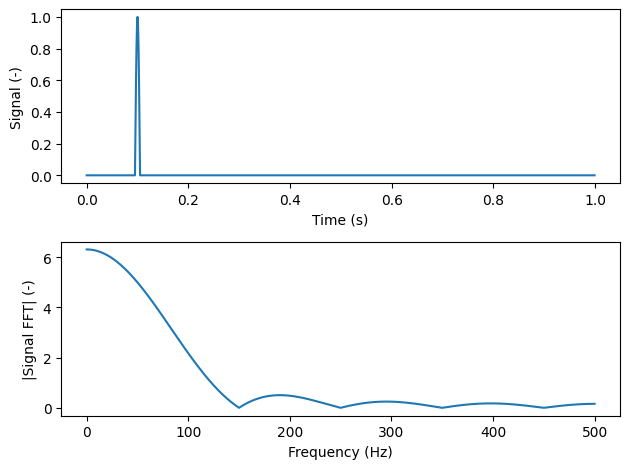

In [8]:
# Compute the signal
frequency = 100 # Hz
sample_rate = 1000 # Hz
dt = 1/sample_rate # seconds
num_samples = 1000 # Samples
times = np.arange(num_samples)*dt
signal = sdpy.generator.pulse(num_samples,0.1,0.01,dt=dt)

# Compute its FFT
frequency_lines = np.fft.rfftfreq(num_samples,dt)
signal_fft = np.fft.rfft(signal)

# Plot both
fig,ax = plt.subplots(2,1,num='Pulse Signal')
ax[0].plot(times,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal (-)')
ax[1].plot(frequency_lines,np.abs(signal_fft))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|Signal FFT| (-)')
fig.tight_layout()

## Considerations for Multiple-Input Excitation

In addition to considerations for satisfying the FFT assumptions, there are also signals that are more useful when performing testing with multiple inputs simultaneously.  In this class of testing, each excitation signal must be independent from the others in order to be able to isolate which responses are due to which exciters.  If, for example, we were to play the exact same signal into each shaker, it would be impossible to figure out which portion of the response would be due to a given shaker.  Considering the H1 technique

$$\mathbf{H}_1 = \mathbf{P}_{XF} {\mathbf{P}_{FF}}^{-1}$$

we see that we will be inverting the $\mathbf{P}_{FF}$ matrix.  In order to invert this matrix, it must be full rank.  Recall that this matrix is computed from what is essentially the outer-product of the input spectra

$$\mathbf{P}_{FF} = {\sum_{i=1}^n \mathbf{F}_i \mathbf{F}_i^* \over n}$$

Therefore, each realization of $\mathbf{F}_i \mathbf{F}_i^*$ will be rank 1.  Indeed, if we only used one average ($n=1$) to compute the signal, or if the relationships between the signals do not change over each average, then the matrix $\mathbf{P}_{FF}$ will be rank deficient and unable to be inverted.  This introduces the constraint that we must have at least as many averages as we have exciters in order to ensure that $\mathbf{P}_{FF}$ is full rank.

If we have multiple-exciters, it is clear that we need to change the relationships between the input signals for each measurement frame.  The easiest way to do this is to add an element of randomness to the signal.  If we only have one exciter, then the $\mathbf{P}_{FF}$ matrix will be full rank regardless of number of averages or characteristics of the signals, so we don't need to worry (though averaging in this case is still useful to reduce noise).

## Types of Modal Excitation

With the considerations mentioned previously in mind, we can introduce some of the more popular excitation techniques for experimental modal analysis.  We will introduce the techniques on the ``beam_plate`` example system from the ``sdynpy.demo`` package.  We will use the ``simulate_test`` method of the ``System`` object to easily simulate a test.

In [9]:
# Import modules
import sdynpy as sdpy
import numpy as np
import matplotlib.pyplot as plt
# Import demo problem
from sdynpy.demo.beam_plate import system,geometry
# Solve for the modal solution so that we have an easier system to integrate
shapes = system.eigensolution(maximum_frequency=1500)
# Add damping
shapes.damping = 0.01
modal_system = shapes.system()

We will investigate both a single-exciter and a multi-exciter case for each signal.  We will excite the plate structure on two of the four corners, and measure responses at all nodes of the system in the perpendicular direction.

In [10]:
reference_dofs = sdpy.coordinate_array([1,41],3)
response_dofs = sdpy.coordinate_array(np.arange(45)+1,3)

geometry.plot_coordinate(reference_dofs);

![plate_excitation_locations.gif](figures/plate_excitation_locations.gif)

### Random Vibration

The first signal we will investigate is the simple random excitation.  Due to the random nature of the signal any given realization of the signal may or may not have significant content at each frequency line.  Therefore, we will generally use a larger number of averages for a random test.

In [11]:
# Multi-reference
response_random_mimo,reference_random_mimo = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 1000,
    num_averages = 30,
    excitation = 'random',
    references = reference_dofs,
    responses = {2:response_dofs}
    )

Due to the random nature of the signal, it will not generally satisfy the periodicity requirement.  We can see this by plotting the first and last portion of the first average to see that it does not start and end at the same value.

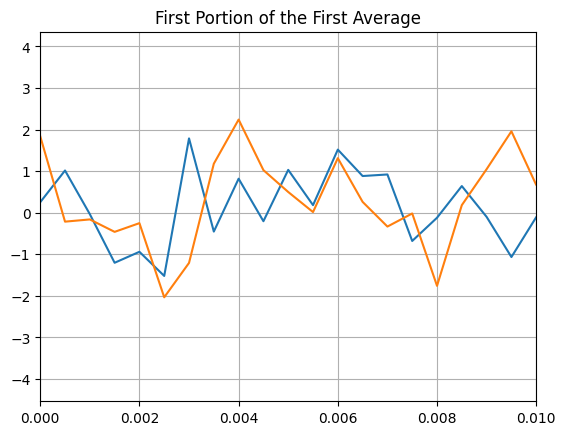

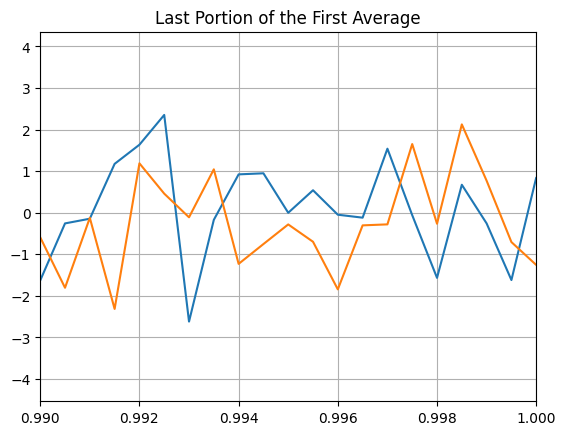

In [12]:
reference_random_mimo.plot()
plt.xlim(0,0.01)
plt.grid(True)
plt.title('First Portion of the First Average')

reference_random_mimo.plot()
plt.xlim(0.99,1)
plt.grid(True)
plt.title('Last Portion of the First Average');

Because the signal is not periodic, we will need to apply a window function in order to force periodicity.  Note that this does distort the signal; however, the distortion is not as bad as the leakage that would occur without the window function.

We can compute frequency response functions using the ``SignalProcessingGUI``.

In [13]:
all_signals = np.concatenate((reference_random_mimo,response_random_mimo))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


![random_spgui.png](figures/random_spgui.png)

From the ``SignalProcessingGUI`` we can see the effect of the window function.

![windowed_time_random.png](figures/windowed_time_random.png)

Note that because the Hann window attenuates the first and last section of the measurement frame, we will generally overlap the measurement frames by 50% to ensure that all portions of the signal are considered; the regions that are attenuated to zero in a frame will be unattenuated in a frame shifted by half a frame width.

We can also see the frequency response function and coherence of the signal.

![frf_random.png](figures/frf_random.png)
![coherence_random.png](figures/coherence_random.png)

We can see the degredation of the coherence and increased noise in the frequency response function if we remove the window function.

![frf_random_nowindow.png](figures/frf_random_nowindow.png)
![coherence_random_nowindow.png](figures/coherence_random_nowindow.png)

Note that even with the window function, the coherence is still not perfect across the entire frequency band.  The window function artificially attenuates portions of the signals, which results in a distortion of the input-output relationship of the system.  Because the forces in the beginning of the measurement frame are attenuated, responses in the middle of the frame can appear to not correlate to any input.  Additionally at the forces toward the end of the frame will have responses due to those forces artificially attenuated by the window.  For this reason, it is expected to see coherence drops not only at the anti-resonances of the frequency response functions, but also at the resonances, particularly the lower-frequency resonances where the signal will tend to take longer to die out.

Random excitation has the advantage of being relatively easy to implement.  No triggering is needed to align the signal with a measurement frame.  Additionally, because there is excitation and response across the entire measurement frame, the signal-to-noise ratio is relatively high.  Finally, the random signal can linearize slight nonlinearities about a given excitation level, so it is useful when trying to fit modes (which inherently assumes a linear system) for slightly nonlinear systems.

The main disadvantage of this signal, as stated above, is that it is not periodic within the measurement frame.  Distortion of the signal is inevitable, even with a window function applied.  Practically, this distortion will cause an overestimation of damping at lower frequencies.  Additionally, if the coherence drop at a given mode is significant enough, shape estimates can also appear noisy or distorted.

### Pseudorandom Excitation

With the main disadvantage of a random signal being its non-periodicity, we can imagine a signal that is random-like but is also periodic within the measurement frame.  For example, if we take a set of sine waves that are periodic within the measurement frame (e.g. no leakage) and randomize their phases, we will have a random-looking signal that is also periodic within the measurement frame.  Because this is a deterministic signal, we will generally not require a significant number of averages to obtain a clean signal.

In [14]:
# Multi-reference
response_pr_mimo,reference_pr_mimo = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 1000,
    num_averages = 10,
    excitation = 'pseudorandom',
    references = reference_dofs,
    responses = {2:response_dofs}
    )

We can immediately see that SDynPy has warned us against using pseudorandom excitation for a multiple-input test.  This is because a pseudorandom excitation signal simply repeats the same signal over and over again to ensure periodicity in the excitation and periodicity in the responses.  If, for example, we use the H1 estimator

$$\mathbf{H}_1 = \mathbf{P}_{XF} {\mathbf{P}_{FF}}^{-1}$$

we will be trying to invert the rank deficient $\mathbf{P}_{FF}$ matrix.  We can see this if we try to compute frequency response functions from the previous pseudorandom dataset.  We will again compute frequency response functions with the `SignalProcessingGUI`.

In [15]:
all_signals = np.concatenate((reference_pr_mimo,response_pr_mimo))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


We can set up our signal processing GUI to compute frequency response functions, recognizing for this case we do not need a window function applied to the data due to it being periodic.  We also set frame acceptance to `Select` and reject the first measurement frame as the response have not yet achieved steady state responses.

![mimo_pr_spgui.png](figures/mimo_pr_spgui.png)

If we compute the frequency response functions for this case, they look terrible compared to the frequency response functions from the random case, again due to inverting a rank-deficient matrix.

![frf_pr.png](figures/frf_pr.png)

However, we will note that the coherence in this case looks very good.

![coherence_pr.png](figures/coherence_pr.png)

An inexperienced test engineer may look at the coherence metric and claim that because it is close to 1, this must be a good test.  However, it is important to remember what the coherence is actually telling us--that the responses are due to the inputs.  In this case, this is true, the responses are all very much correlated to the inputs.  Unfortunately, that doesn't mean we can tell which portions of the response came from which input, and this is required for computing the frequency response function.

We could play some games to get multiple-input testing to work with pseudorandom excitation.  For example, by re-randomizing the phases of the signals for each measurement frame we could add independent components to the $\mathbf{P}_{FF}$ matrix allowing it to be inverted.  However, we must ensure we allow the system to come to steady state prior to taking the response measurement (otherwise we are back to the non-periodic random case where a window is required)  This increases test time as well as the chance for making errors.  Typically pseudorandom excitation is used only for cases where a single excitation is required.

In [16]:
# Single-reference
response_pr_simo,reference_pr_simo = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 1000,
    num_averages = 10,
    excitation = 'pseudorandom',
    references = reference_dofs[0],
    responses = {2:response_dofs}
    )
all_signals = np.concatenate((reference_pr_simo,response_pr_simo))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


We can set up the `SignalProcessingGUI` similarly

![simo_pr_spgui.png](figures/simo_pr_spgui.png)

and get significantly improved estimation of the frequency response function.

![frf_simo_pr.png](figures/frf_simo_pr.png)

The coherence looks similarly good, with minor dips at the antiresonances.

![coherence_simo_pr.png](figures/coherence_simo_pr.png)

### Chirp Excitation

One could imagine instead of producing a random-like signal using a sum of sine waves with randomized phases to cover multiple frequencies in a broadband excitation, one could instead simply produce a single sine wave with a frequency that ramps between two values.  This signal would then cover all frequencies between these two values.  This is called a chirp excitation.

Chirp excitation generally shares similar properties to the pseudorandom signal.  They are both deterministic signals, so few averages are required.  They also do not require window functions if they are played repeatedly, allowing the system to come to steady state.  Finally, they are both generally better suited to single-input testing.

In [17]:
# Single-reference
response_chirp_simo,reference_chirp_simo = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 1000,
    num_averages = 10,
    excitation = 'chirp',
    references = reference_dofs[0],
    responses = {2:response_dofs},
    excitation_min_frequency = 10,
    excitation_max_frequency = 500
    )

We can see that in a given measurement frame we have excitation frequency content from the minimum specified frequency to the maximum specified frequency.

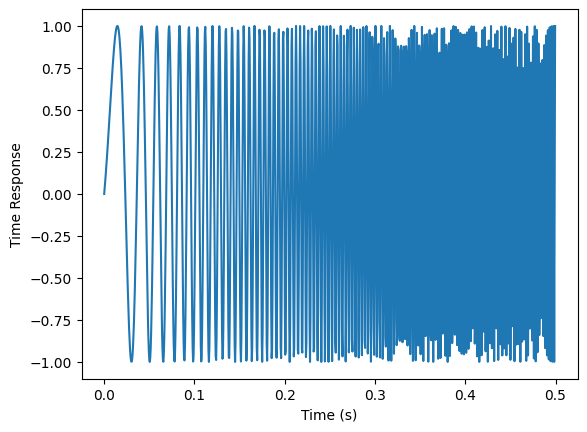

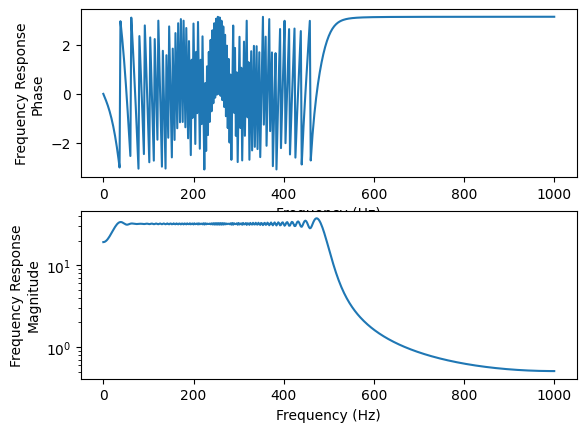

In [18]:
# Extract just the first measurement frame
first_frame = reference_chirp_simo.extract_elements(slice(1000))
ax = first_frame.plot()
ax.set_ylabel('Time Response')
ax.set_xlabel('Time (s)')
first_frame_fft = first_frame.fft()
ax = first_frame_fft.plot()
ax[0].set_ylabel('Frequency Response\nPhase')
ax[0].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency Response\nMagnitude')
ax[1].set_xlabel('Frequency (Hz)');

We can then compute the frequency response function identically to the pseudorandom signal.

In [19]:
all_signals = np.concatenate((reference_chirp_simo,response_chirp_simo))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


![simo_chirp_spgui.png](figures/simo_chirp_spgui.png)

We get good frequency response functions and coherence.

![frf_chirp.png](figures/frf_chirp.png)

![coherence_chirp.png](figures/coherence_chirp.png)

Note that the frequency response function was computed well over the entire bandwidth, while the chirp signal only covered a portion of the bandwidth.  This is not realistic and is an artifact of the signals being synthesized analytically without any noise added.  You can see in the fast Fourier transform of the excitation signal, while the major components of the signal were between 10 and 500 Hz, there was still lesser components of the signal at higher and lower frequencies.  In a real test with realistic noise sources, these lesser components may be below the noise floor of the test and frequency response and coherence may degrade outside the bandwidth of the signal.  One should generally try to tailor the signal to match the frequency range of interest.

### Burst Random Excitation

We have now seen three types of signals.  The Random signal was not periodic and required a window function, but it was able to be used with multiple excitation signals.  The Chirp and Pseudorandom signals didn't require a window function, but were not able to be easily used with mutliple excitation signals.  The Burst Random signal attempts to provide a signal that is both periodic within the measurement frame as well as useful for multi-exciter testing.

The idea of a Burst Random signal is that the excitation is only active for a portion of the measurement frame.  The signal starts at zero, ramps up to a random signal at some point in the frame, then ramps back down to zero.  By both starting at ending at zero, the measurement can be considered periodic because the measurement frame can be repeated indefinitely without causing discontinuities at the measurement frame boundary.  Note that both the excitation force and response must be zero at the start and end of the frame, so the excitation must be stopped with enough time left in the frame for the measurement to decay to zero.

Similar to a Random signal, the random portion of the Burst Random signal is randomly generated.  This means each measurement frame will have a different realization of the signal and a different phasing between the different exciters.  The $\mathbf{P}_{FF}$ matrix will therefore be full-rank and invertable assuming at least as many measurement frames as exciters are used.

There are a few disadvantages of the Burst Random signal.  Because it is a random signal, any given frame may not have significant excitation at a given frequency line, so a larger number of averages is generally required.  Additionally, because the signal is only active for a portion of the measurement frame, the signal-to-noise ratio of the Burst Random excitation may be lower than that of a Random excitation.  Finally, due to its transient nature, we are unable to overlap frames in a Burst Random test like we can with a Random test and the frames may need to be made longer in order to allow the response to decay to zero within a measurement frame.  All of these generally contribute to a longer-running test than some of the other signals investigated.  However, given it can take hours or even days to set up a single test, the addition of a few extra minutes of test time is generally a very small price to pay in order to be able to acquire all excitation locations simultaneously and without any distortion.

In [20]:
# Multi-reference
response_burst_mimo,reference_burst_mimo = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 4000, # Need to increase frame length to allow decay to 0
    num_averages = 30,
    excitation = 'burst random',
    references = reference_dofs,
    responses = {2:response_dofs},
    signal_fraction = 0.5
    )
all_signals = np.concatenate((reference_burst_mimo,response_burst_mimo))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


We can set up the `SignalProcessingGUI` similarly to the Random case, except we will set no overlap nor window function in this case.

![mimo_br_spgui.png](figures/mimo_br_spgui.png)

We see that the frequency response function and coherence both look very good in this case.

![frf_br.png](figures/frf_br.png)

![coherence_br.png](figures/coherence_br.png)


### Impulse Excitation

The previous sections all discussed various types of signals you could play into a system using a shaker to excite the structure.  However setting up and aligning a shaker can be non-trivial.  For many "simple" modal tests, it is much less effort to simply use an impact hammer to apply an impulse to the structure.  An impulse will result in broadband excitation of the system over which frequency response functions can be computed.

One disadvantage of an impulse hammer is it is much more difficult to precisely set the bandwidth of the excitation.  While the user can chose, for example, the stiffness of a hammer tip (a harder tip will result in a higher-frequency excitation), it is nearly impossible to, for example, cut off the excitation content at exactly 300 Hz.  For this reason, impact testing practitioners must be keenly aware of the concept of aliasing in their signals, which occurs when there is excitation or system response past the Nyquist frequency of the test.  Particularly when using a modern data acquisition system with high-quality antialiasing filters, this is less of an issue than it has been in the past.  However, one must still be aware that antialiasing filters are not perfect, so it is unwise to excite significantly past the bandwidth of interest.  One must be especially aware if using a data acquisition system that is already discrete, such as imaging with a high speed camera, or downsampling already acquired data, as there is no anti-aliasing filter in this case.

In [21]:
# Single-reference
response_impact,reference_impact = modal_system.simulate_test(
    bandwidth = 1000,
    frame_length = 1000,
    num_averages = 10,
    excitation = 'hammer',
    references = reference_dofs[0],
    responses = {2:response_dofs},
    excitation_max_frequency = 500,
    extra_time_between_frames = 1.5
    )

It is often useful to look at the frequency response of the impact to evaluate the potential for aliasing, as well as to ensure there is significant content over the frequency band of interest.

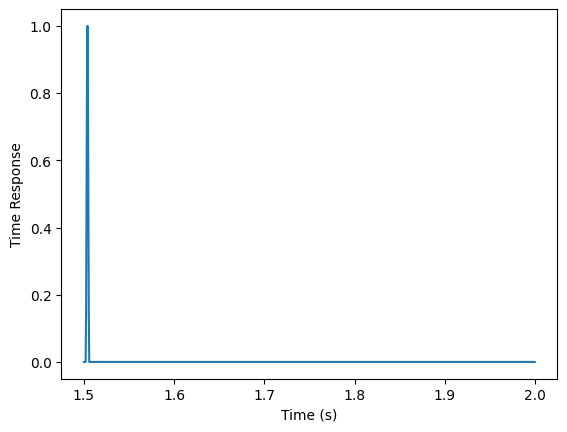

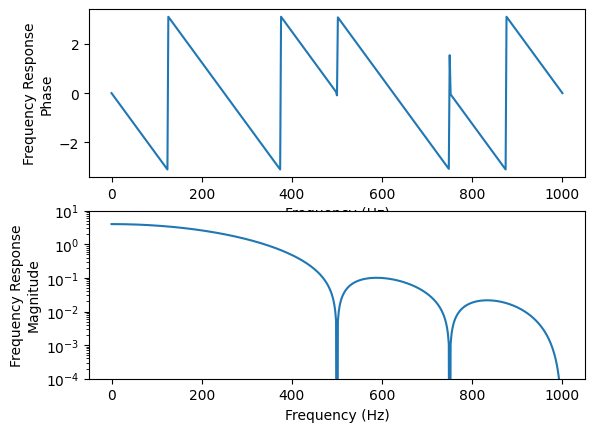

In [22]:
# Extract just the first measurement frame
first_frame = reference_impact.extract_elements(slice(3000,4000))
ax = first_frame.plot()
ax.set_ylabel('Time Response')
ax.set_xlabel('Time (s)')
first_frame_fft = first_frame.fft()
ax = first_frame_fft.plot()
ax[0].set_ylabel('Frequency Response\nPhase')
ax[0].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency Response\nMagnitude')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylim(1e-4,1e1);

One can see that the frequency content of an impact tends to "roll off" slowly over frequency, and that there are significant dips in the frequency response.  There is therefore no frequency where the effect of aliasing is identically 0, so one must determine when the roll-off is "good enough".  Similarly one also must decide what "good enough" is when evaluating the frequency content over the bandwidth of interest.  There are several "rules of thumb" that have evolved over the years (for example, the autospectrum of the excitation must not drop by more than 2 orders of magnitude (100x) over the frequency band of interest).  However, with the advent of low-noise, 24-bit data acquisition systems, these rules have become more flexible.

When computing frequency response functions, we will generally want the impact to occur near the start of the measurement frame.  For this reason, we often implement triggering of the data acquisition system based on the detection of the impulse.  A pre-trigger (a small portion of the measurement frame kept before the trigger) is often added to ensure the entire impulse is capture.  Most modern data acquisition systems can be triggered using the impulse.  However, if triggering of the data acquisition system is not available, we can simply record the time data and then split the measurement up into measurement frames after the fact.  While this second approach is more effort, it is also more flexible, as it gives the user the opportunity to change the measurement frame length and other signal processing parameters without re-running the test.  We will assume we have the latter case here, and the `SignalProcessingGUI` can be used to set up the triggering.

In [23]:
all_signals = np.concatenate((reference_impact,response_impact))
spgui = sdpy.SignalProcessingGUI(all_signals);

Type Changed
Overlap Changed
References Changed
Responses Changed
Frame Size Changed
Overlap Changed
Overlap Samples Changed


We can set up the `SignalProcessingGUI` to use Triggering and set the trigger channel to the force and set the levels appropriately.  We ensure the measurement frame is long enough to capture the signal.  Here we zoom into a single measurement frame rather than showing all frames.

![impact_spgui.png](figures/impact_spgui.png)

We see that the frequency response function and coherence both look very good in this case except where the signal has dropped out due to the ripples.  In a real test with realistic noise sources, we would eventually see the excitation and response amplitude drop below the noise floor at high frequency, so we would expect a noisy frequency response function and poor coherence at frequencies higher than we have excited.

![frf_impact.png](figures/frf_br.png)

![coherence_impact.png](figures/coherence_br.png)

# Homework Problems
1. For the `modal_system` in this tutorial, compute frequency response functions for Random and Burst Random excitation signals.  Compute frequency response functions for the Random signal both using a Hann window and using no window.  Compare the frequency response functions.  How do they differ, particularly at the lower modes of the system?  What would you expect to happen to the damping estimate of the system in each case?

2. Compute a frequency response function of an impulse signal for the `modal_system` in this tutorial.  Investigate what happens if the entire signal is not included in the measurement frame.  Add an Exponential window to the signal to artificially reduce the signal to zero by the end of the frame.  How do the frequency response functions from the windowed and un-windowed short measurement frame compare to the un-windowed measurement frame that contains the entire response?

3. Add noise to the signals in each of the examples in this tutorial.  Where do each of the excitation techniques break down if noise is present?  Modify the number of averages of each signal and see how the noise on the FRF changes.